# Valores de referência de métricas

### Procedimento
- Recebe caminho para pastas com projetos e a métrica a ser avaliada
- Percorre todas as pastas nesse caminho e busca o csv daquela métrica
- Usa o pandas para salvar esse csv
- Armazena a última coluna desse csv em um array
- gera grafico de distribuição

In [39]:
import os
import csv
import matplotlib.pyplot as plt
from matplotlib import cm, colors

import pandas as pd
import numpy as np
from tqdm import tqdm

%matplotlib inline

In [ ]:
i = 0

In [10]:
metric = 'noc'
root_path = './../../Projetos/'
data = []
for j in tqdm(range(len(os.listdir(root_path)))):
    folder = os.listdir(root_path)[j]
    system_path = os.path.join(root_path, folder)
    metric_path = os.path.join(system_path, metric+'.csv')
    with open(metric_path, 'r') as csv_file:
        csv_reader = csv.reader(csv_file)
        for line in csv_reader:
            if(float(line[-1])!= -1 and line[-1] != 'NaN' and line[-1] != 'nan'):
                data.append(float(line[-1]))


100%|██████████| 44/44 [00:17<00:00,  2.53it/s]


In [5]:
with open('teste.txt','w') as f:
    print(data, file=f)

In [11]:
metric_df = pd.DataFrame(data=data, columns=[metric])
metric_df

,noc
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
240807,0.0
240808,0.0
240809,0.0
240810,0.0


In [65]:
from statistics import mean, mode, median


x = np.arange(0, 100, 1)
y = [np.percentile(data, num) for num in x]
mode_data = mode(data)
avg_data = mean(data)
median_data = median(data)

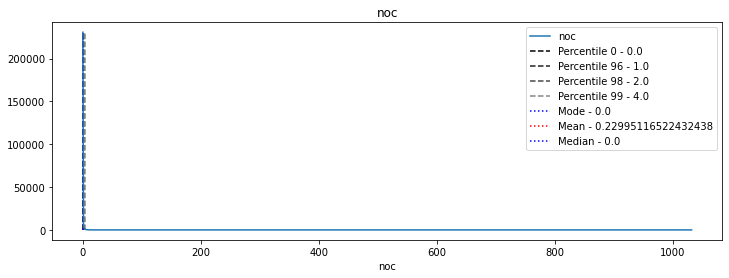

In [66]:
metric_df[metric] = metric_df[metric].apply(pd.to_numeric)

metric_df_groups  = metric_df.groupby([metric])[metric].count()
fig,axs = plt.subplots(figsize=(12,4))
norm = colors.Normalize(vmin=min(y), vmax=max(y)+5, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.Greys_r)
aux = -1
for i,value in enumerate(y):
    if aux == -1 or value != aux :
        axs.vlines(value,0, metric_df_groups.max(), linestyles='dashed', color=mapper.to_rgba(value), label=f"Percentile {x[i]} - {value}"  )
        aux = value
axs.vlines(mode_data,0, metric_df_groups.max(), linestyles='dotted', color='blue', label=f"Mode - {mode_data}"  )
axs.vlines(avg_data,0, metric_df_groups.max(), linestyles='dotted', color='red', label=f"Mean - {avg_data}"  )
axs.vlines(median_data,0, metric_df_groups.max(), linestyles='dotted', color='blue', label=f"Median - {median_data}"  )
metric_df_groups.plot(ax=axs,title=metric)
axs.legend()

#fig.savefig("./Results/"+metric+".png")


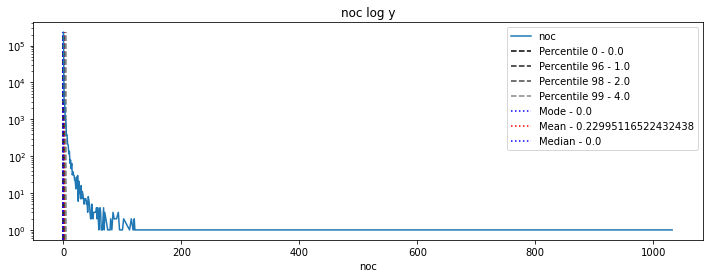

In [67]:
fig_log,axs_log = plt.subplots(figsize=(12,4))
axs_log.set_yscale('log')
norm = colors.Normalize(vmin=min(y), vmax=max(y)+5, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.Greys_r)
aux = -1
for i,value in enumerate(y):
    if aux == -1 or value != aux :
        axs_log.vlines(value,0, metric_df_groups.max(), linestyles='dashed', color=mapper.to_rgba(value), label=f"Percentile {x[i]} - {value}"  )
        aux = value
axs_log.vlines(mode_data,0, metric_df_groups.max(), linestyles='dotted', color='blue', label=f"Mode - {mode_data}"  )
axs_log.vlines(avg_data,0, metric_df_groups.max(), linestyles='dotted', color='red', label=f"Mean - {avg_data}"  )
axs_log.vlines(median_data,0, metric_df_groups.max(), linestyles='dotted', color='blue', label=f"Median - {median_data}"  )
metric_df_groups.plot(ax=axs_log,title=metric + " log y")
axs_log.legend()


#fig_log.savefig("./Results/"+metric+"_logY.png")

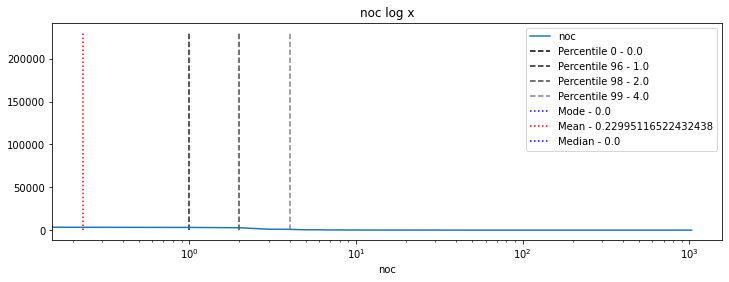

In [72]:
fig_log,axs_log = plt.subplots(figsize=(12,4))
axs_log.set_xscale('log')
norm = colors.Normalize(vmin=min(y), vmax=max(y)+5, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.Greys_r)
aux = -1
for i,value in enumerate(y):
    if aux == -1 or value != aux :
        axs_log.vlines(value,0, metric_df_groups.max(), linestyles='dashed', color=mapper.to_rgba(value), label=f"Percentile {x[i]} - {value}"  )
        aux = value
axs_log.vlines(mode_data,0, metric_df_groups.max(), linestyles='dotted', color='blue', label=f"Mode - {mode_data}"  )
axs_log.vlines(avg_data,0, metric_df_groups.max(), linestyles='dotted', color='red', label=f"Mean - {avg_data}"  )
axs_log.vlines(median_data,0, metric_df_groups.max(), linestyles='dotted', color='blue', label=f"Median - {median_data}"  )
metric_df_groups.plot(ax=axs_log,title=metric + " log x")
axs_log.legend()

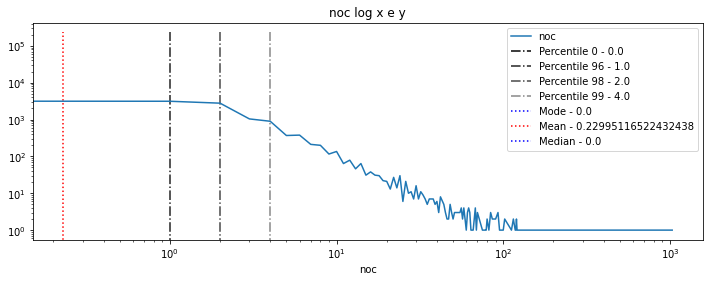

In [70]:
fig_log,axs_log = plt.subplots(figsize=(12,4))
axs_log.set_yscale('log')
axs_log.set_xscale('log')
norm = colors.Normalize(vmin=min(y), vmax=max(y)+5, clip=True)
mapper = cm.ScalarMappable(norm=norm, cmap=cm.Greys_r)
aux = -1
for i,value in enumerate(y):
    if aux == -1 or value != aux :
        axs_log.vlines(value,0, metric_df_groups.max(), linestyles='dashdot', color=mapper.to_rgba(value), label=f"Percentile {x[i]} - {value}"  )
        aux = value
axs_log.vlines(mode_data,0, metric_df_groups.max(), linestyles='dotted', color='blue', label=f"Mode - {mode_data}"  )
axs_log.vlines(avg_data,0, metric_df_groups.max(), linestyles='dotted', color='red', label=f"Mean - {avg_data}"  )
axs_log.vlines(median_data,0, metric_df_groups.max(), linestyles='dotted', color='blue', label=f"Median - {median_data}"  )
metric_df_groups.plot(ax=axs_log,title=metric+" log x e y")
axs_log.legend()

fig_log.savefig("./Results/"+metric+"_logXY.png")

In [ ]:
metric_df_groups

tryCatchQty
0.0     535392
1.0      27104
2.0       7260
3.0       2860
4.0       1540
5.0        616
6.0        528
7.0        176
8.0        220
9.0         88
10.0        44
11.0        44
12.0        88
16.0        44
17.0        44
21.0        44
Name: tryCatchQty, dtype: int64

In [ ]:

with open("./Results/"+metric+".txt", 'w') as result_file:
    print("Average: "+str(np.average(data)), file=result_file)
    print("Standard deviation: "+str(np.std(data)), file=result_file)
    print("Percentile 70: "+str(np.percentile(data, 70)), file=result_file)
    print("Percentile 90: "+str(np.percentile(data,90)), file=result_file)

In [6]:
def resultsFind(metric:str, root_path:str):
    data = []
    for j in tqdm(range(len(os.listdir(root_path)))):
        folder = os.listdir(root_path)[j]
        system_path = os.path.join(root_path, folder)
        metric_path = os.path.join(system_path, metric+'.csv')
        with open(metric_path, 'r') as csv_file:
            csv_reader = csv.reader(csv_file)
            for line in csv_reader:
                if(float(line[-1])!= -1 and line[-1] != 'NaN' and line[-1] != 'nan'):
                    data.append(float(line[-1]))
    data = np.sort(data)
    metric_df = pd.DataFrame(data=data, columns=[metric])
    metric_df[metric] = metric_df[metric].apply(pd.to_numeric)
    metric_df_groups  = metric_df.groupby([metric])[metric].count()
    
    fig,axs = plt.subplots(figsize=(12,4))
    metric_df_groups.plot(ax=axs,title=metric)

    fig.savefig("./Results/"+metric+".png")
    
    fig_log,axs_log = plt.subplots(figsize=(12,4))
    axs_log.set_yscale('log')
    metric_df_groups.plot(ax=axs_log,title=metric + " log y")

    fig_log.savefig("./Results/"+metric+"_logY.png")

    
    fig_log,axs_log = plt.subplots(figsize=(12,4))
    axs_log.set_yscale('log')
    axs_log.set_xscale('log')
    metric_df_groups.plot(ax=axs_log,title=metric+" log x e y")

    fig_log.savefig("./ResultsTCC2/"+metric+"_logXY.png")

    
    
    with open("./ResultsTCC2/"+metric+".txt", 'w') as result_file:
        print("Average: "+str(np.average(data)), file=result_file)
        print("Standard deviation: "+str(np.std(data)), file=result_file)
        print("Percentile 70: "+str(np.percentile(data, 70)), file=result_file)
        print("Percentile 90: "+str(np.percentile(data,90)), file=result_file)
    
    return data
    
    
    
    

100%|██████████| 44/44 [01:05<00:00,  1.48s/it]


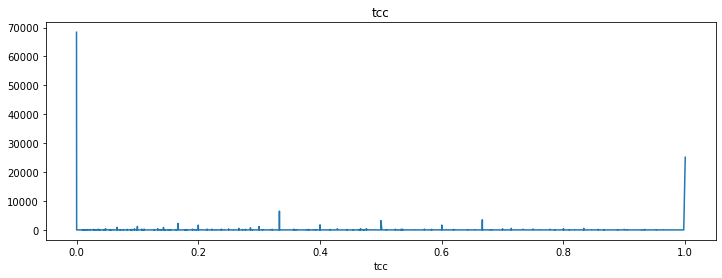

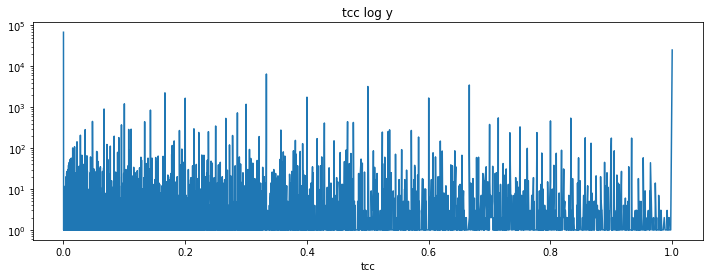

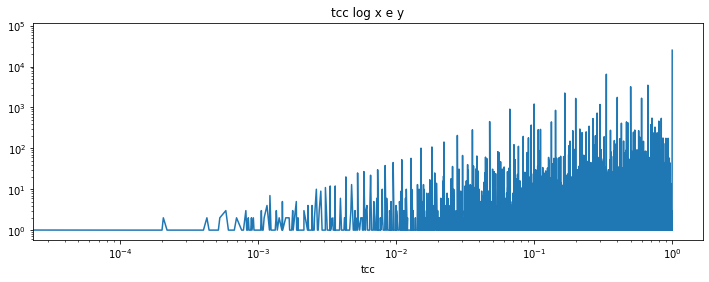

In [10]:
data = resultsFind('tcc', '../../Projetos/')

In [8]:
for value in data:
    print(value)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
